<a href="https://colab.research.google.com/github/RajarshiRay25/Chronic-Kidney-disease-ML-Model-with-cross-validation-and-hyperparameter-tuning/blob/main/Chronic_Kidney_Disease_EDA%2BModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Chronic Kidney disease dataset based on certain medical factors

| Column | Label        | Description                                                     |
|--------|--------------|-----------------------------------------------------------------|
| Bp     | Blood pressure     | Blood pressure measurement (mmHg)                              |
| Sg     | Specific gravity       | Specific gravity of urine                                      |
| Al     | Albumin       | Presence of albumin in urine (values from 0 to 5)               |
| Su     | Sugar        | Presence of sugar in urine (values from 0 to 5)                 |
| Rbc    | Red blood cells        | Presence of red blood cells in urine (1 indicates presence, 0 indicates absence) |
| Bu     | Blood urea        | Blood urea measurement (mg/dL)                               |
| Sc     | Serum creatinine        | Serum creatinine measurement (mg/dL)                         |
| Sod    | Sodium        | Sodium measurement (mEq/L)                                   |
| Pot    | Potassium     | Potassium measurement (mEq/L)                                |
| Hemo   | Hemoglobin     | Hemoglobin measurement (g/dL)                                |
| Wbcc   | White blood cell count    | White blood cell count measurement (cells/cubic mm)           |
| Rbcc   | Red blood cell count     | Red blood cell count measurement (millions/cubic mm)          |
| Htn    | Hypertension      | Presence of hypertension (0 indicates no hypertension, 1 indicates hypertension) |
| Class  | Class label       | Class label or outcome (1 indicates a positive result, 0 indicates a negative result) |


##Source of dataset : https://www.kaggle.com/datasets/abhia1999/chronic-kidney-disease?q=medical+datasets+in%3Adatasets

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./kidney_disease.csv')
df.head()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1


In [3]:
# See all columns

df.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [4]:
# See information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [5]:
# Statistical description of dataset

df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


In [6]:
# See Null values if any

df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [7]:
# Count the classification values in target column

df['Class'].value_counts()

1    250
0    150
Name: Class, dtype: int64

In [8]:
df.shape

(400, 14)

# Performing EDA on the dataset

| Class | Meaning                                                     |
|-------|-------------------------------------------------------------|
| 0     | Negative result or absence of a Kidney Disease   |
| 1     | Positive result or presence of Kidney Disease|


In [9]:
# Correlation checking ( positive value means positive correlation and negative value means negative correlation and 0 means no correlation)

correlation_data = df.corr()
correlation_data

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
Bp,1.000000,-0.164057,0.146060,0.190277,-0.151478,0.184173,0.144469,-0.103383,0.066791,-0.279441,0.025963,-0.220827,0.268003,0.290145
Sg,-0.164057,1.000000,-0.460835,-0.292053,0.253894,-0.249263,-0.176141,0.217456,-0.063450,0.492103,-0.206880,0.443437,-0.318956,-0.659504
Al,0.146060,-0.460835,1.000000,0.262564,-0.374484,0.405035,0.229396,-0.270709,0.114484,-0.548681,0.200664,-0.454131,0.478309,0.598389
Su,0.190277,-0.292053,0.262564,1.000000,-0.092940,0.126074,0.094568,-0.053448,0.180098,-0.156875,0.159033,-0.163825,0.253179,0.294555
Rbc,-0.151478,0.253894,-0.374484,-0.092940,1.000000,-0.236270,-0.138391,0.140568,0.018164,0.280991,-0.002205,0.202298,-0.139342,-0.282642
Bu,0.184173,-0.249263,0.405035,0.126074,-0.236270,1.000000,0.581176,-0.307357,0.336954,-0.540699,0.041530,-0.465947,0.387503,0.371982
Sc,0.144469,-0.176141,0.229396,0.094568,-0.138391,0.581176,1.000000,-0.624493,0.205361,-0.342053,-0.005420,-0.323056,0.273904,0.294076
Sod,-0.103383,0.217456,-0.270709,-0.053448,0.140568,-0.307357,-0.624493,1.000000,0.067414,0.333604,0.006334,0.316883,-0.306501,-0.342268
Pot,0.066791,-0.063450,0.114484,0.180098,0.018164,0.336954,0.205361,0.067414,1.000000,-0.100612,-0.074057,-0.120418,0.057028,0.077063
Hemo,-0.279441,0.492103,-0.548681,-0.156875,0.280991,-0.540699,-0.342053,0.333604,-0.100612,1.000000,-0.153806,0.681864,-0.576932,-0.729537


<Axes: >

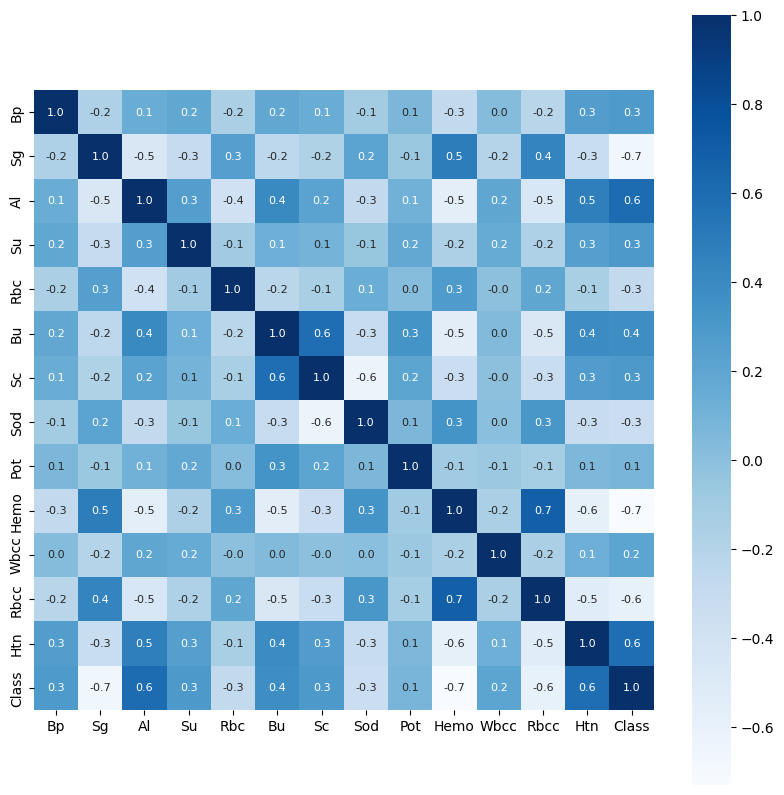

In [10]:
# Create a heatmap to visualise the correlation

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_data,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: xlabel='Bp', ylabel='Sg'>

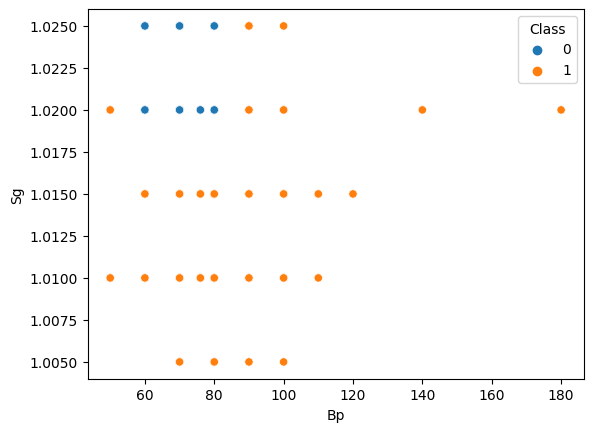

In [11]:
# Scatter plots to visualise data class

sns.scatterplot(x=df['Bp'],y=df['Sg'],hue=df['Class'])

<Axes: xlabel='Al', ylabel='Bu'>

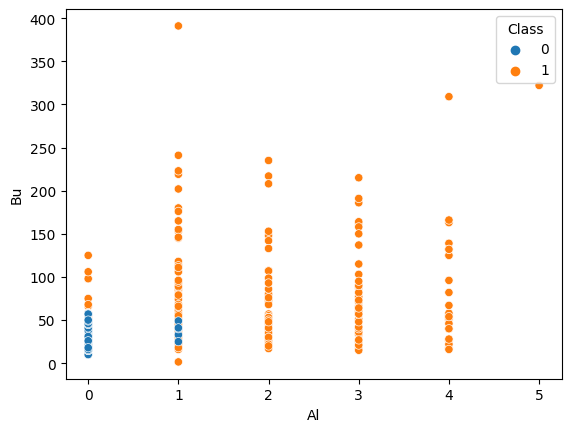

In [12]:
# Scatter plots to visualise data class

sns.scatterplot(x=df['Al'],y=df['Bu'],hue=df['Class'])

<Axes: xlabel='Al', ylabel='Rbc'>

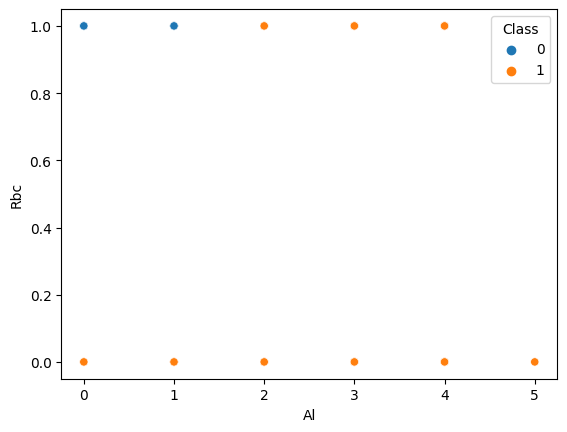

In [13]:
# Scatter plots to visualise data class

sns.scatterplot(x=df['Al'],y=df['Rbc'],hue=df['Class'])

<Axes: xlabel='Rbc', ylabel='Hemo'>

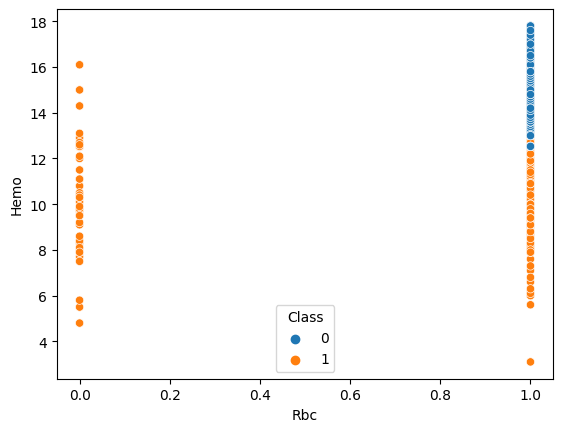

In [14]:
# Scatter plots to visualise data class

sns.scatterplot(x=df['Rbc'],y=df['Hemo'],hue=df['Class'])

<Axes: xlabel='Class', ylabel='count'>

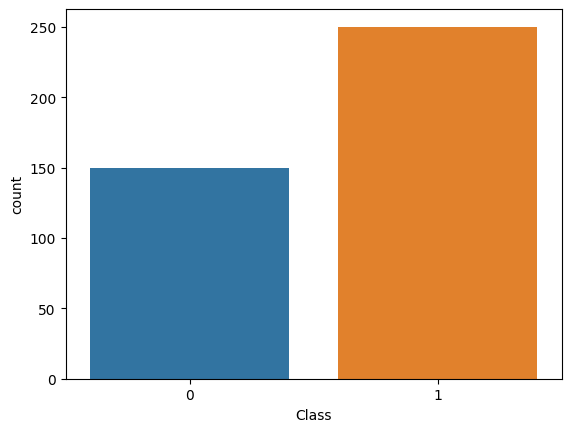

In [15]:
# Visualising count plots

sns.countplot(x=df['Class'],data=df)

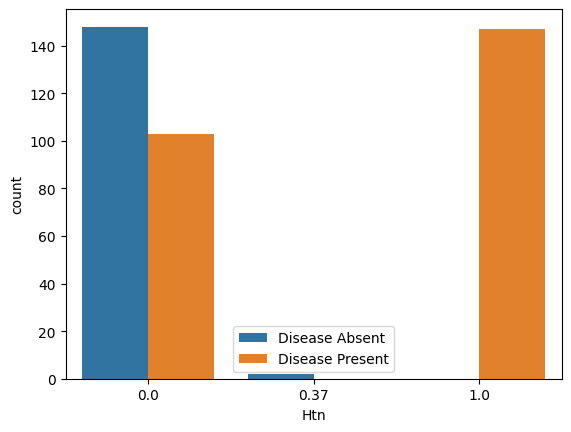

In [16]:
# Htn is hypertension , counting the disease class wrt hypertension levels

sns.countplot(x=df['Htn'],hue=df['Class'],data=df)
plt.legend(['Disease Absent','Disease Present'])

## Analysing Distribution of various data on Kidney disease outcomes

---

Box-Plot determines the interquantile range(IQR) of the data points and determines the 25 and 75 percentile values.
 We can also The "maximum" and "minimum" values, in the context you provided, are used to define the boundaries for detecting outliers based on the IQR:

Maximum: The maximum value is calculated as Q3 + 1.5 * IQR. Any data point above this value is considered a potential outlier.
Minimum: The minimum value is calculated as Q1 - 1.5 * IQR. Any data point below this value is considered a potential outlier.

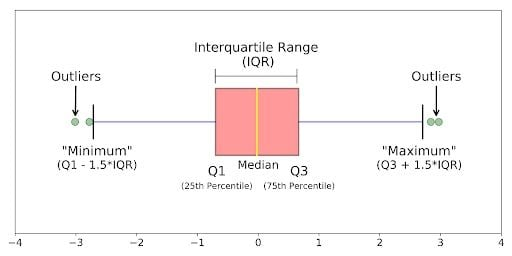

Text(0.5, 1.0, 'Chronic Kidney Disease Distribution on BP levels')

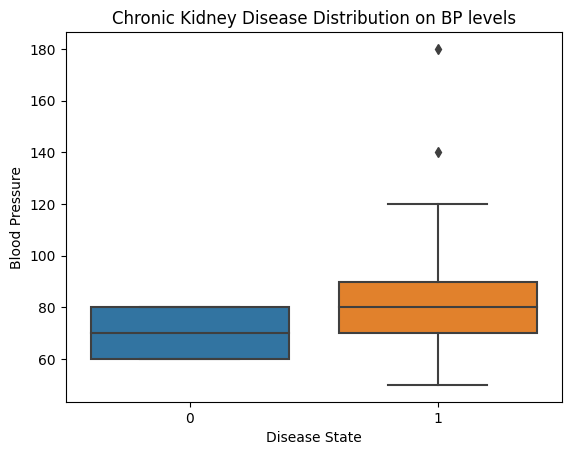

In [17]:
# Visualising distributions

sns.boxplot(x=df['Class'],y=df['Bp'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Blood Pressure')
plt.title('Chronic Kidney Disease Distribution on BP levels')

Text(0.5, 1.0, 'Chronic Kidney Disease Distribution on urinal gravity levels')

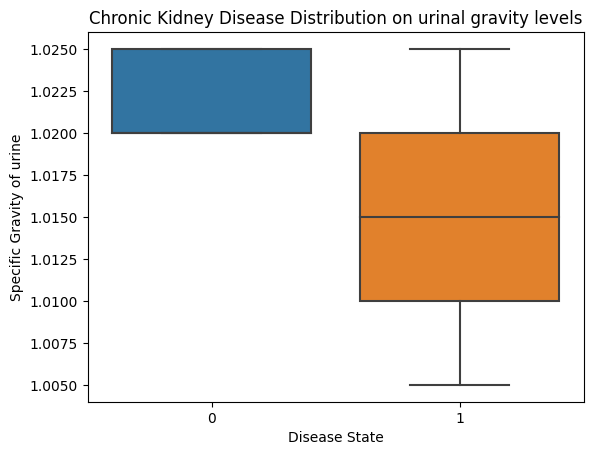

In [18]:
sns.boxplot(x=df['Class'],y=df['Sg'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Specific Gravity of urine')
plt.title('Chronic Kidney Disease Distribution on urinal gravity levels')

Text(0.5, 1.0, 'Chronic Kidney Disease Distribution on Albumin levels in urine')

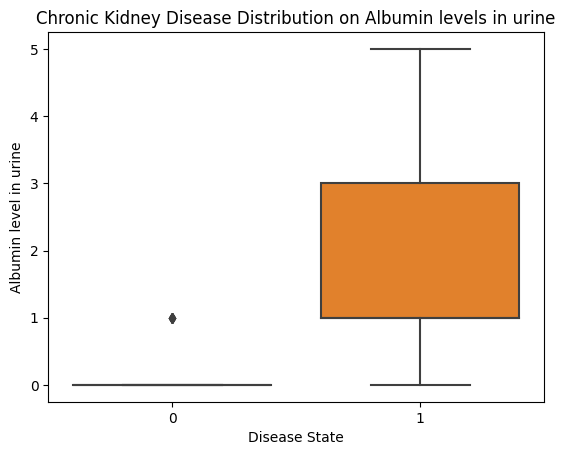

In [19]:
sns.boxplot(x=df['Class'],y=df['Al'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Albumin level in urine')
plt.title('Chronic Kidney Disease Distribution on Albumin levels in urine')

Text(0.5, 1.0, 'Chronic Kidney Disease Distribution on haemoglobin level')

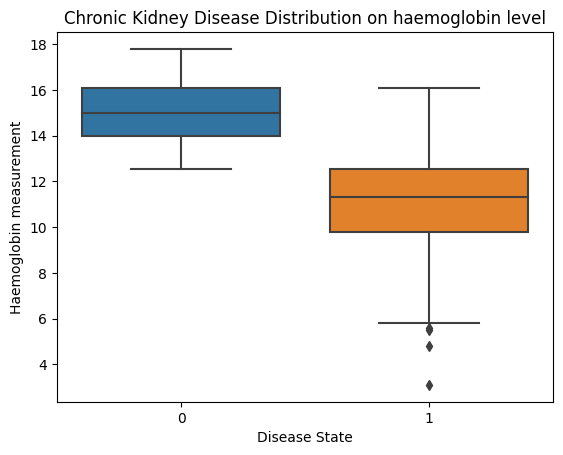

In [20]:
sns.boxplot(x=df['Class'],y=df['Hemo'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Haemoglobin measurement')
plt.title('Chronic Kidney Disease Distribution on haemoglobin level')

Text(0.5, 1.0, 'Chronic Kidney Disease Distribution on RBC count level')

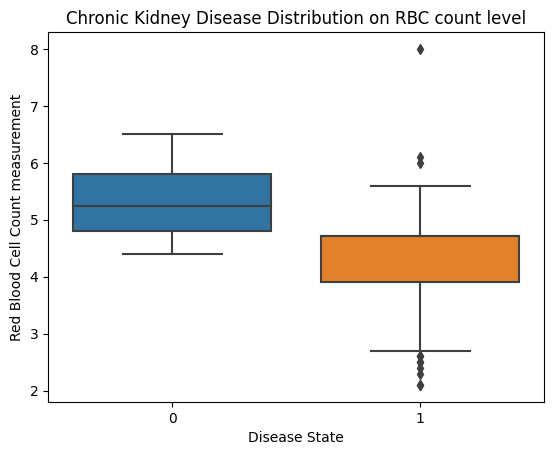

In [21]:
sns.boxplot(x=df['Class'],y=df['Rbcc'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Red Blood Cell Count measurement')
plt.title('Chronic Kidney Disease Distribution on RBC count level')

Text(0.5, 1.0, 'Chronic Kidney Disease Distribution on Hypertension level')

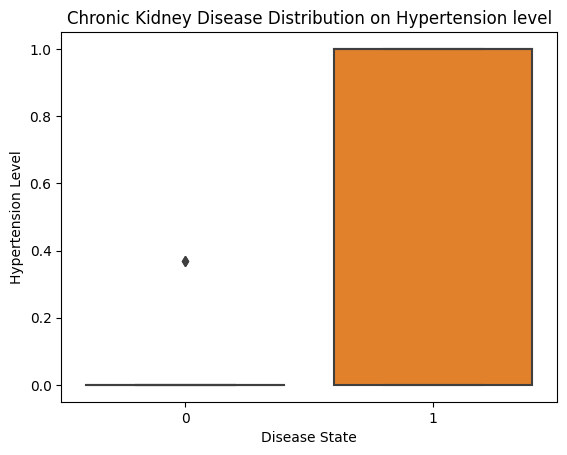

In [22]:
sns.boxplot(x=df['Class'],y=df['Htn'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Hypertension Level')
plt.title('Chronic Kidney Disease Distribution on Hypertension level')

(1.0, 10.0)

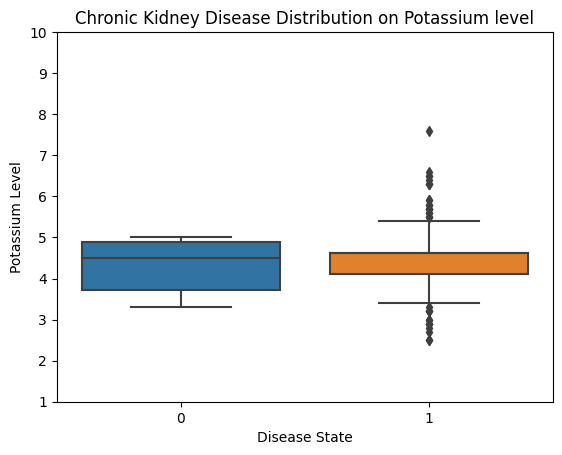

In [23]:
sns.boxplot(x=df['Class'],y=df['Pot'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Potassium Level')
plt.title('Chronic Kidney Disease Distribution on Potassium level')
plt.ylim(1,10)

(120.0, 160.0)

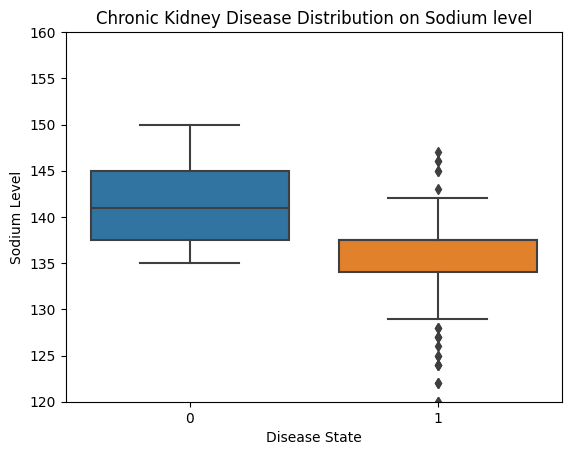

In [24]:
sns.boxplot(x=df['Class'],y=df['Sod'],data=df)
plt.xlabel('Disease State')
plt.ylabel('Sodium Level')
plt.title('Chronic Kidney Disease Distribution on Sodium level')
plt.ylim(120,160)

##Outliers removal using IQR

In [25]:
import pandas as pd

# Assuming 'df' is your DataFrame

# Iterate over each column
for col in df.columns:
  if col != 'Outcome':
    # Calculate quartiles for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Compute IQR for the column
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for the column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the respective bound values
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound


    # Print the bounds for the column
    print(f"Column: {col}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print("--------------------")


Column: Bp
Lower Bound: 55.0
Upper Bound: 95.0
--------------------
Column: Sg
Lower Bound: 1.0074999999999998
Upper Bound: 1.0275000000000003
--------------------
Column: Al
Lower Bound: -3.0
Upper Bound: 5.0
--------------------
Column: Su
Lower Bound: 0.0
Upper Bound: 0.0
--------------------
Column: Rbc
Lower Bound: 1.0
Upper Bound: 1.0
--------------------
Column: Bu
Lower Bound: -25.125
Upper Bound: 113.875
--------------------
Column: Sc
Lower Bound: -2.355
Upper Bound: 6.324999999999999
--------------------
Column: Sod
Lower Bound: 126.0
Upper Bound: 150.0
--------------------
Column: Pot
Lower Bound: 2.8000000000000003
Upper Bound: 6.0
--------------------
Column: Hemo
Lower Bound: 5.25
Upper Bound: 20.25
--------------------
Column: Wbcc
Lower Bound: 3337.5
Upper Bound: 13037.5
--------------------
Column: Rbcc
Lower Bound: 3.6000000000000005
Upper Bound: 5.999999999999999
--------------------
Column: Htn
Lower Bound: -1.5
Upper Bound: 2.5
--------------------
Column: Class
L

## Creating the Classification ML Models

In [26]:
# importing models

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [28]:
# Train test split

X = df.drop(columns='Class',axis=1)
y = df['Class']

In [29]:
X

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn
0,80.0,1.0200,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0
1,55.0,1.0200,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0
2,80.0,1.0100,2.0,0.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0
3,70.0,1.0075,4.0,0.0,1.0,56.0,3.8,126.00,2.80,11.2,6700.0,3.90,1.0
4,80.0,1.0100,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.0200,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0
396,70.0,1.0250,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.00,0.0
397,80.0,1.0200,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0
398,60.0,1.0250,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0


In [30]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: Class, Length: 400, dtype: float64

In [31]:
# Initially using train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,stratify = y, random_state=2)

In [32]:
models = [LogisticRegression(max_iter=700),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [33]:
best_model = None
best_score = 0.0

for model in models:
  model.fit(X_train,y_train)
  predict_data = model.predict(X_test)

  accuracy_level = accuracy_score(y_test,predict_data)
  if accuracy_level > best_score:
    best_model = model
    best_score = accuracy_level

  print(f"Model used for classification is --> {model} & the accuracy score is --> {round(accuracy_level*100,2)}%")
  print("------------------------")

# Finalising the perfect model

print()
print(f"Model with the highest score --> {best_model}")
print(f"Highest score --> {round(best_score*100,2)}%")

Model used for classification is --> LogisticRegression(max_iter=700) & the accuracy score is --> 94.0%
------------------------
Model used for classification is --> SVC(kernel='linear') & the accuracy score is --> 90.0%
------------------------
Model used for classification is --> KNeighborsClassifier() & the accuracy score is --> 68.0%
------------------------
Model used for classification is --> RandomForestClassifier() & the accuracy score is --> 98.0%
------------------------
Model used for classification is --> DecisionTreeClassifier() & the accuracy score is --> 97.0%
------------------------

Model with the highest score --> RandomForestClassifier()
Highest score --> 98.0%


## Creating Cross Validation Scoring Models

In [34]:
models_cv = [LogisticRegression(max_iter=700),SVC(kernel='linear'),KNeighborsClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [35]:
best_model_cv = None
best_score_cv = 0.0

for model in models_cv:
  cv_score_models = cross_val_score(model,X,y,cv=5)
  cv_mean_score = sum(cv_score_models)/len(cv_score_models)

  if cv_mean_score > best_score_cv:
    best_model_cv = model
    best_score_cv = cv_mean_score

  print(f"Model used : {model} & Cross Validation Scores : {cv_score_models}")
  print(f"Model used : {model} & Mean CV Score : {round(cv_mean_score,2)*100}%")
  print(" ")
  print('***********************************************************')

# Finalising the perfect model

print()
print(f"Model with the highest score --> {best_model_cv}")
print(f"Highest Mean CV score --> {round(best_score_cv*100,2)}%")


Model used : LogisticRegression(max_iter=700) & Cross Validation Scores : [0.9625 0.9625 0.925  0.9625 0.9875]
Model used : LogisticRegression(max_iter=700) & Mean CV Score : 96.0%
 
***********************************************************
Model used : SVC(kernel='linear') & Cross Validation Scores : [0.9375 0.9625 0.9375 0.975  0.975 ]
Model used : SVC(kernel='linear') & Mean CV Score : 96.0%
 
***********************************************************
Model used : KNeighborsClassifier() & Cross Validation Scores : [0.6875 0.7    0.725  0.75   0.7125]
Model used : KNeighborsClassifier() & Mean CV Score : 72.0%
 
***********************************************************
Model used : RandomForestClassifier() & Cross Validation Scores : [0.9875 1.     0.95   0.975  1.    ]
Model used : RandomForestClassifier() & Mean CV Score : 98.0%
 
***********************************************************
Model used : DecisionTreeClassifier() & Cross Validation Scores : [0.9625 0.975  0.95   

## Hyper-parameter tuning for all the models for core accuracy

Table Source : ChatGPT

| Algorithm | Hyperparameters | Syntax | Description |
|---|---|---|---|
| Logistic Regression | *C* (regularization strength) | `C=float` | Controls the trade-off between model complexity and accuracy. |
| Support Vector Machines (SVM) | *Kernel* (type of kernel function) | `kernel='linear'` or `kernel='poly'` or `kernel='rbf'` or `kernel='sigmoid'` | Specifies the similarity measure between data points. |
| *C* (regularization strength) | `C=float` | Controls the trade-off between model complexity and accuracy. |
| *Gamma* (kernel coefficient) | `gamma=float` | Controls the width of the decision boundary. |
| K-Nearest Neighbors (KNN) | *K* (number of neighbors) | `n_neighbors=int` | Specifies the number of neighbors to consider when making a prediction. |
| *Weights* (weights for each neighbor) | `weights='uniform'` or `weights='distance'` | Specifies how much weight to give to each neighbor when making a prediction. |
| *Metric* (distance metric) | `metric='euclidean'` or `metric='manhattan'` or `metric='minkowski'` | Specifies the distance metric to use when measuring the similarity between data points. |
| Decision Trees | *Max depth* | `max_depth=int` | Specifies the maximum depth of the decision tree. |
| *Min samples split* | `min_samples_split=int` | Specifies the minimum number of samples required to split a node. |
| *Min samples leaf* | `min_samples_leaf=int` | Specifies the minimum number of samples required to be a leaf node. |
| Random Forest | *Number of trees* | `n_estimators=int` | Specifies the number of trees to build in the forest. |
| *Max depth* | `max_depth=int` | Specifies the maximum depth of each tree in the forest. |
| *Min samples split* | `min_samples_split=int` | Specifies the minimum number of samples required to split a node in each tree. |
| *Min samples leaf* | `min_samples_leaf=int` | Specifies the minimum number of samples required to be a leaf node in each tree. |
| Gradient Boosting | *Number of estimators* | `n_estimators=int` | Specifies the number of trees to build in the ensemble. |
| *Learning rate* | `learning_rate=float` | Specifies the step size when updating the model parameters. |
| *Loss function* | `loss='least_squares'` or `loss='cross_entropy'` | Specifies the loss function to use when training the model. |


In [36]:
# Defining a dictionary which contains hyper-parameters for all models

model_hyperparams = {
    'log_reg_params' : {
        'C' : [1,5,10,25,30,35]
    },

    'svc_params' : {
        'kernel' : ['linear','rbf','poly','sigmoid'],
        'C' : [1,5,10,25,30,35]
    },

    'kn_clf_params' : {
        'n_neighbors' : [3,5,10,20,25,30]
    },

    'rnf_params' : {
        'n_estimators' : [10, 20, 50, 100,250,500]
    },

    'dt_clf_params' : {
        'max_depth' : [10,35,40,50,60,75],
        'random_state' : [0,5,10,15,20,25]
    }
}

In [37]:
# Initialising the hyperparameters for multiple model training

hyper_params_list = list(model_hyperparams.keys())
hyper_params_list

['log_reg_params',
 'svc_params',
 'kn_clf_params',
 'rnf_params',
 'dt_clf_params']

In [38]:
models_hyp = [LogisticRegression(max_iter=700),SVC(),KNeighborsClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [39]:
# Scaling the X data for avoiding warnings in hyper_parameter tuning

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [40]:
X_scaled

array([[ 0.39284326,  0.42066234, -0.01180416, ..., -0.23515257,
         0.68209608,  1.30997921],
       [-1.89378804,  0.42066234,  2.34902872, ..., -1.12310948,
        -0.04491916, -0.76720974],
       [ 0.39284326, -1.45415587,  0.77514013, ..., -0.38314539,
        -0.04491916, -0.76720974],
       ...,
       [ 0.39284326,  0.42066234, -0.79874846, ..., -0.82712384,
         0.97883699, -0.76720974],
       [-1.43646178,  1.35807144, -0.79874846, ..., -0.53113821,
         1.72068926, -0.76720974],
       [ 0.39284326,  1.35807144, -0.79874846, ..., -0.72846196,
         1.86905972, -0.76720974]])

## Grid Search CV

In [41]:
algo_results = []

i = 0   # i initialised to 0 to iterate over the model list to access hyper parameters

for model in models_hyp:
  active_model = hyper_params_list[i]   # Setting the model with accordance to model list
  parameters_active = model_hyperparams[active_model]  # activating the respective hyperparameters for the model

  i+=1  # next model

  print(f"Model Used : {model}")
  print(f"Hyper-parameters used : {parameters_active}")

  # Training the models

  grid_search_clf = GridSearchCV(model,parameters_active,cv=6)
  grid_search_clf.fit(X_scaled,y)

  # Saving the results

  algo_results.append({
      'Model' : model,
      'Highest Score' : grid_search_clf.best_score_ ,
      'Best Parameters' : grid_search_clf.best_params_
  })

  # Converting to dataframe

  final_results = pd.DataFrame(algo_results)

Model Used : LogisticRegression(max_iter=700)
Hyper-parameters used : {'C': [1, 5, 10, 25, 30, 35]}
Model Used : SVC()
Hyper-parameters used : {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 5, 10, 25, 30, 35]}
Model Used : KNeighborsClassifier()
Hyper-parameters used : {'n_neighbors': [3, 5, 10, 20, 25, 30]}
Model Used : RandomForestClassifier()
Hyper-parameters used : {'n_estimators': [10, 20, 50, 100, 250, 500]}
Model Used : DecisionTreeClassifier()
Hyper-parameters used : {'max_depth': [10, 35, 40, 50, 60, 75], 'random_state': [0, 5, 10, 15, 20, 25]}


In [42]:
final_results  # see results

,Model,Highest Score,Best Parameters
0,LogisticRegression(max_iter=700),0.982549,{'C': 5}
1,SVC(),0.982512,"{'C': 10, 'kernel': 'rbf'}"
2,KNeighborsClassifier(),0.975011,{'n_neighbors': 10}
3,RandomForestClassifier(),0.992462,{'n_estimators': 10}
4,DecisionTreeClassifier(),0.972599,"{'max_depth': 10, 'random_state': 5}"


In [43]:
final_results.to_csv('Grid_SearchCV.csv')  # Get results

## Randomised Search CV

In [44]:
algo_results_ran = []

i = 0   # i initialised to 0 to iterate over the model list to access hyper parameters

for model in models_cv:
  active_model = hyper_params_list[i]   # Setting the model with accordance to model list
  parameters_active = model_hyperparams[active_model]  # activating the respective hyperparameters for the model

  i=i+1  # next model

  print(f"Model Used : {model}")
  print(f"Hyper-parameters used : {parameters_active}")

  # Training the models

  random_search_cv = RandomizedSearchCV(model,parameters_active,cv=5)
  random_search_cv.fit(X_scaled,y)

  # Saving the results

  algo_results_ran.append({
      'Model' : model,
      'Highest Score' : random_search_cv.best_score_,
      'Best Parameters' : random_search_cv.best_params_
  })

  # Converting to dataframe

  final_results_ran = pd.DataFrame(algo_results_ran)

Model Used : LogisticRegression(max_iter=700)
Hyper-parameters used : {'C': [1, 5, 10, 25, 30, 35]}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Used : SVC(kernel='linear')
Hyper-parameters used : {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [1, 5, 10, 25, 30, 35]}
Model Used : KNeighborsClassifier()
Hyper-parameters used : {'n_neighbors': [3, 5, 10, 20, 25, 30]}
Model Used : RandomForestClassifier()
Hyper-parameters used : {'n_estimators': [10, 20, 50, 100, 250, 500]}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Used : DecisionTreeClassifier()
Hyper-parameters used : {'max_depth': [10, 35, 40, 50, 60, 75], 'random_state': [0, 5, 10, 15, 20, 25]}


In [45]:
final_results_ran

,Model,Highest Score,Best Parameters
0,LogisticRegression(max_iter=700),0.9825,{'C': 5}
1,SVC(kernel='linear'),0.9800,"{'kernel': 'linear', 'C': 1}"
2,KNeighborsClassifier(),0.9725,{'n_neighbors': 10}
3,RandomForestClassifier(),0.9900,{'n_estimators': 250}
4,DecisionTreeClassifier(),0.9775,"{'random_state': 5, 'max_depth': 75}"


In [46]:
final_results_ran.to_csv('Randomised_searchCV.csv')  # Get results